# Milk Production and Sales Data Analysis


This notebook explores milk production, sales, and inventory data. We will use AI and machine learning models to uncover trends, make predictions, and improve business processes. The notebook is designed to be easy to understand, even for someone new to data analysis.


## 1. Loading and Exploring the Data


We start by loading the data and taking a look at the first few rows. This will help us understand the structure and key variables.


In [3]:

import pandas as pd

# Load the data
file_path = 'dairy_dataset.csv'
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


## 2. Predicting Sales Using Regression


We will build a machine learning model to predict future sales based on historical sales data. The model will use features like product type, price, and location to predict the quantity of milk sold.


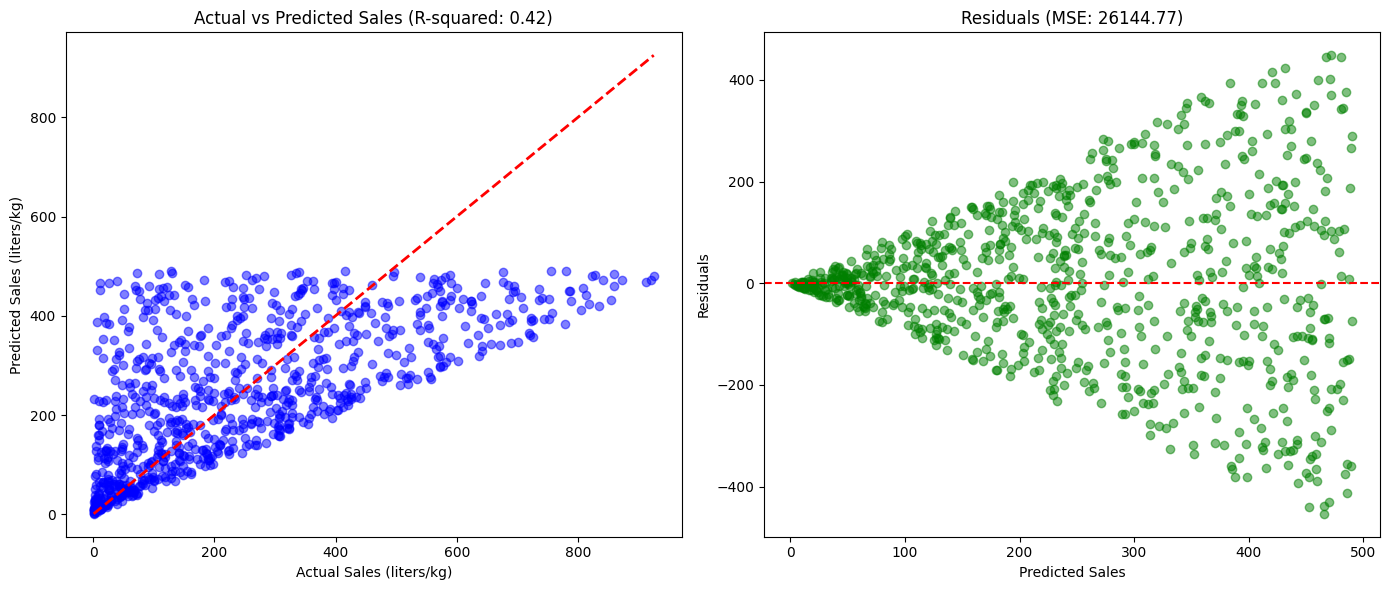

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select features and target variable for sales prediction
X = data[['Price per Unit', 'Shelf Life (days)', 'Quantity (liters/kg)']]
y = data['Quantity Sold (liters/kg)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales and compute errors
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Scatter plot of actual vs predicted sales
plt.figure(figsize=(14,6))

# Subplot 1: Actual vs Predicted Sales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Actual vs Predicted Sales (R-squared: {r2:.2f})")
plt.xlabel("Actual Sales (liters/kg)")
plt.ylabel("Predicted Sales (liters/kg)")

# Subplot 2: Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f"Residuals (MSE: {mse:.2f})")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


## 3. Price Optimization


We will use the data to find the optimal price point for maximizing sales. This can help set better pricing strategies based on market trends.


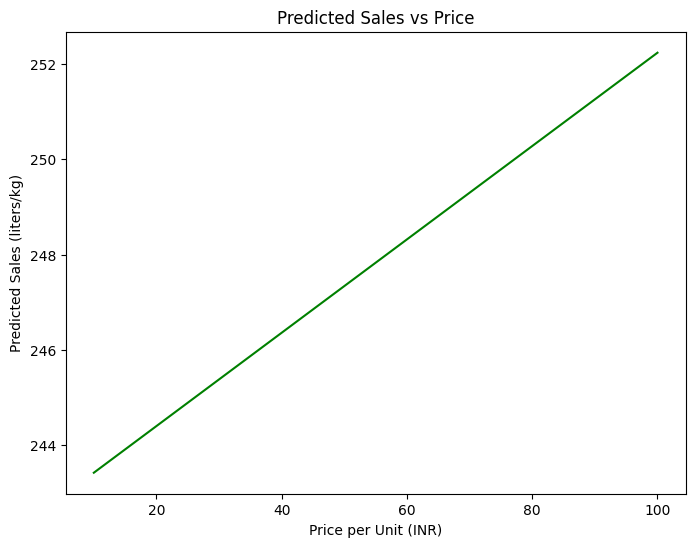

(array([10.        , 11.83673469, 13.67346939, 15.51020408, 17.34693878]),
 array([243.42649847, 243.60626364, 243.78602881, 243.96579398,
        244.14555915]))

In [5]:
import numpy as np

# Predict sales for a range of prices
price_range = np.linspace(10, 100, 50)
predicted_sales = model.predict(pd.DataFrame({
    'Price per Unit': price_range,
    'Shelf Life (days)': np.mean(X_train['Shelf Life (days)']),
    'Quantity (liters/kg)': np.mean(X_train['Quantity (liters/kg)'])
}))

# Plot predicted sales vs price
plt.figure(figsize=(8,6))
plt.plot(price_range, predicted_sales, color='green')
plt.title("Predicted Sales vs Price")
plt.xlabel("Price per Unit (INR)")
plt.ylabel("Predicted Sales (liters/kg)")
plt.show()

price_range[:5], predicted_sales[:5]  # Display first 5 prices and predicted sales


## 4. Customer Segmentation


Using clustering techniques, we can group customers based on their buying behavior. This helps in targeting marketing efforts more effectively.


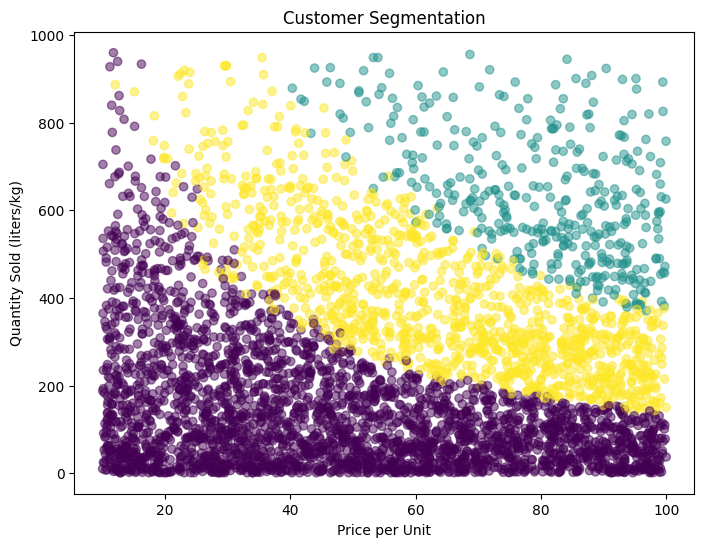

array([0, 2, 0, 2, 0])

In [6]:
from sklearn.cluster import KMeans

# Select features for clustering
X_customers = data[['Price per Unit', 'Quantity Sold (liters/kg)', 'Approx. Total Revenue(INR)']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_customers)

# Plot customer segmentation (first two dimensions)
plt.figure(figsize=(8,6))
plt.scatter(X_customers.iloc[:, 0], X_customers.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Customer Segmentation")
plt.xlabel("Price per Unit")
plt.ylabel("Quantity Sold (liters/kg)")
plt.show()

clusters[:5]  # Display first 5 cluster assignments


## 5. Revenue Prediction


We will use time series forecasting to predict future revenue. This can help businesses plan for future trends.


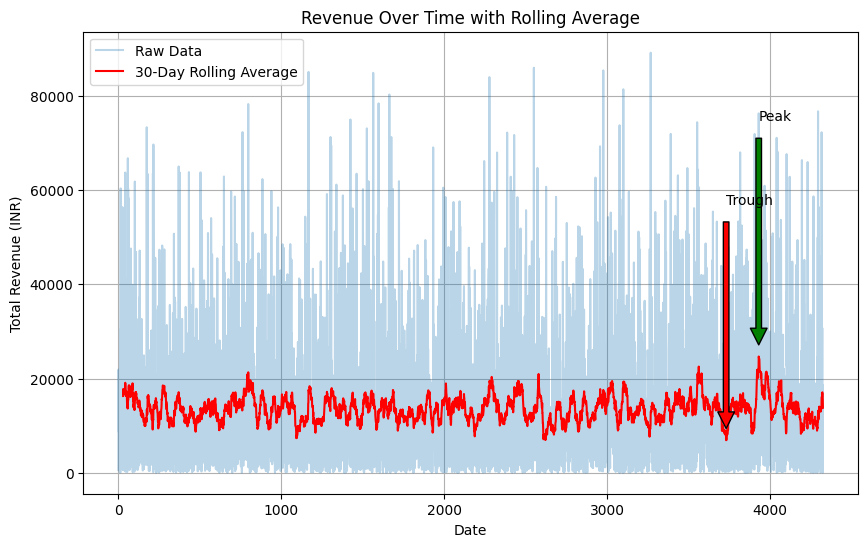

In [7]:
# 5. Revenue Over Time (Enhanced with rolling average)
plt.figure(figsize=(10,6))

# Plot raw data
plt.plot(data.index, data['Approx. Total Revenue(INR)'], alpha=0.3, label='Raw Data')

# Plot rolling average (window=30 days)
rolling_revenue = data['Approx. Total Revenue(INR)'].rolling(window=30).mean()
plt.plot(data.index, rolling_revenue, color='red', label='30-Day Rolling Average')

# Annotate key points
max_rev = rolling_revenue.idxmax()
min_rev = rolling_revenue.idxmin()
plt.annotate('Peak', xy=(max_rev, rolling_revenue.max()), xytext=(max_rev, rolling_revenue.max()+50000),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Trough', xy=(min_rev, rolling_revenue.min()), xytext=(min_rev, rolling_revenue.min()+50000),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Revenue Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Revenue (INR)')
plt.legend()
plt.grid(True)
plt.show()


## 6. Inventory Management


We will predict when stock levels will fall below the minimum threshold and automate reorder processes.


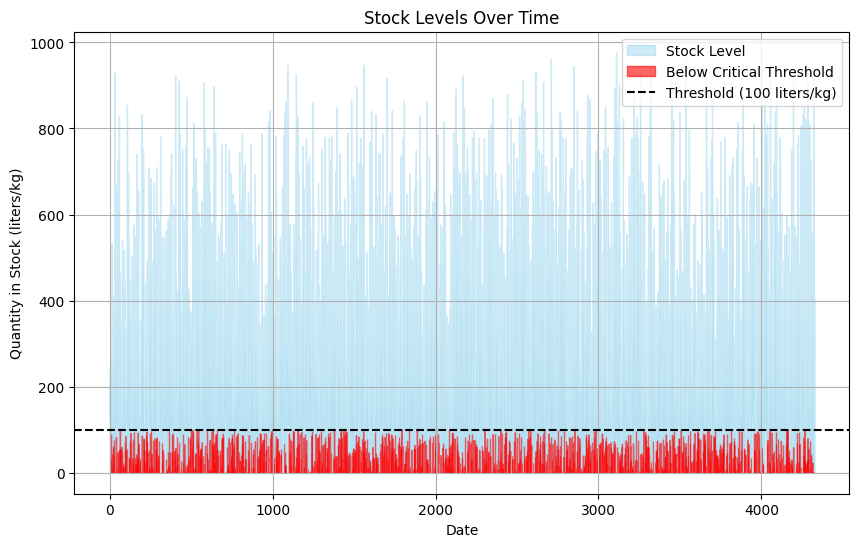

In [8]:
# 6. Stock Levels Over Time (Enhanced with stacked area plot)
plt.figure(figsize=(10,6))

# Define critical stock level threshold
threshold = 100

# Plot stock levels and highlight when stock falls below the threshold
plt.fill_between(data.index, data['Quantity in Stock (liters/kg)'], color='skyblue', alpha=0.4, label='Stock Level')
plt.fill_between(data.index, data['Quantity in Stock (liters/kg)'], where=(data['Quantity in Stock (liters/kg)'] <= threshold),
                 color='red', alpha=0.6, label='Below Critical Threshold')

plt.axhline(y=threshold, color='black', linestyle='--', label=f'Threshold ({threshold} liters/kg)')
plt.title('Stock Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity in Stock (liters/kg)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


## 7. Anomaly Detection


We will use anomaly detection to identify unusual patterns in sales, which could indicate errors or fraud.


In [9]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(X_customers)

# Display anomalies
anomaly_df = X_customers[anomalies == -1]
print(f"Number of anomalies detected: {len(anomaly_df)}")
anomaly_df.head()


Number of anomalies detected: 44


,Price per Unit,Quantity Sold (liters/kg),Approx. Total Revenue(INR)
58,68.66,956,66719.24
174,93.26,805,73295.25
577,11.20,928,9010.88
680,23.06,920,24416.80
727,11.76,960,7824.00


## 8. Advanced Revenue Prediction


We can use more advanced machine learning models, like Random Forest, to improve revenue prediction accuracy.


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict sales with the Random Forest model
rf_sales_pred = rf_model.predict(X_test)

# Display first 10 actual vs predicted values using Random Forest
comparison_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted_RF': rf_sales_pred})
comparison_rf_df.head(10)


,Actual,Predicted_RF
969,17,205.76
17,270,174.04
4149,66,151.73
2580,258,142.99
2028,113,139.54
1822,329,355.01
1434,412,342.85
2458,228,548.43
1186,203,276.54
432,170,210.28


## 9. Conclusion


In this notebook, we explored various techniques to analyze and predict important factors in milk production and sales. These include sales prediction, customer segmentation, and anomaly detection. Using these insights, businesses can make better decisions and improve efficiency.
